In [8]:
from math import sqrt

import pandas as pd
from matplotlib import rcParams, pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

rcParams['figure.figsize'] = [12, 8]
rcParams['figure.dpi'] = 200

In [9]:
df = pd.read_csv('data/british airways.csv',
                 skiprows=1,
                 names=['ds', 'y'],
                 parse_dates=['ds'],
                 dtype={'y': float})
df.head()

,ds,y
0,2005-07-01,21686.0
1,2005-08-01,20084.0
2,2005-09-01,20635.0
3,2005-10-01,18988.0
4,2005-11-01,15554.0


In [10]:
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

In [11]:
model = Prophet()
model.fit(train_data)

19:50:40 - cmdstanpy - INFO - Chain [1] start processing
19:50:40 - cmdstanpy - INFO - Chain [1] done processing


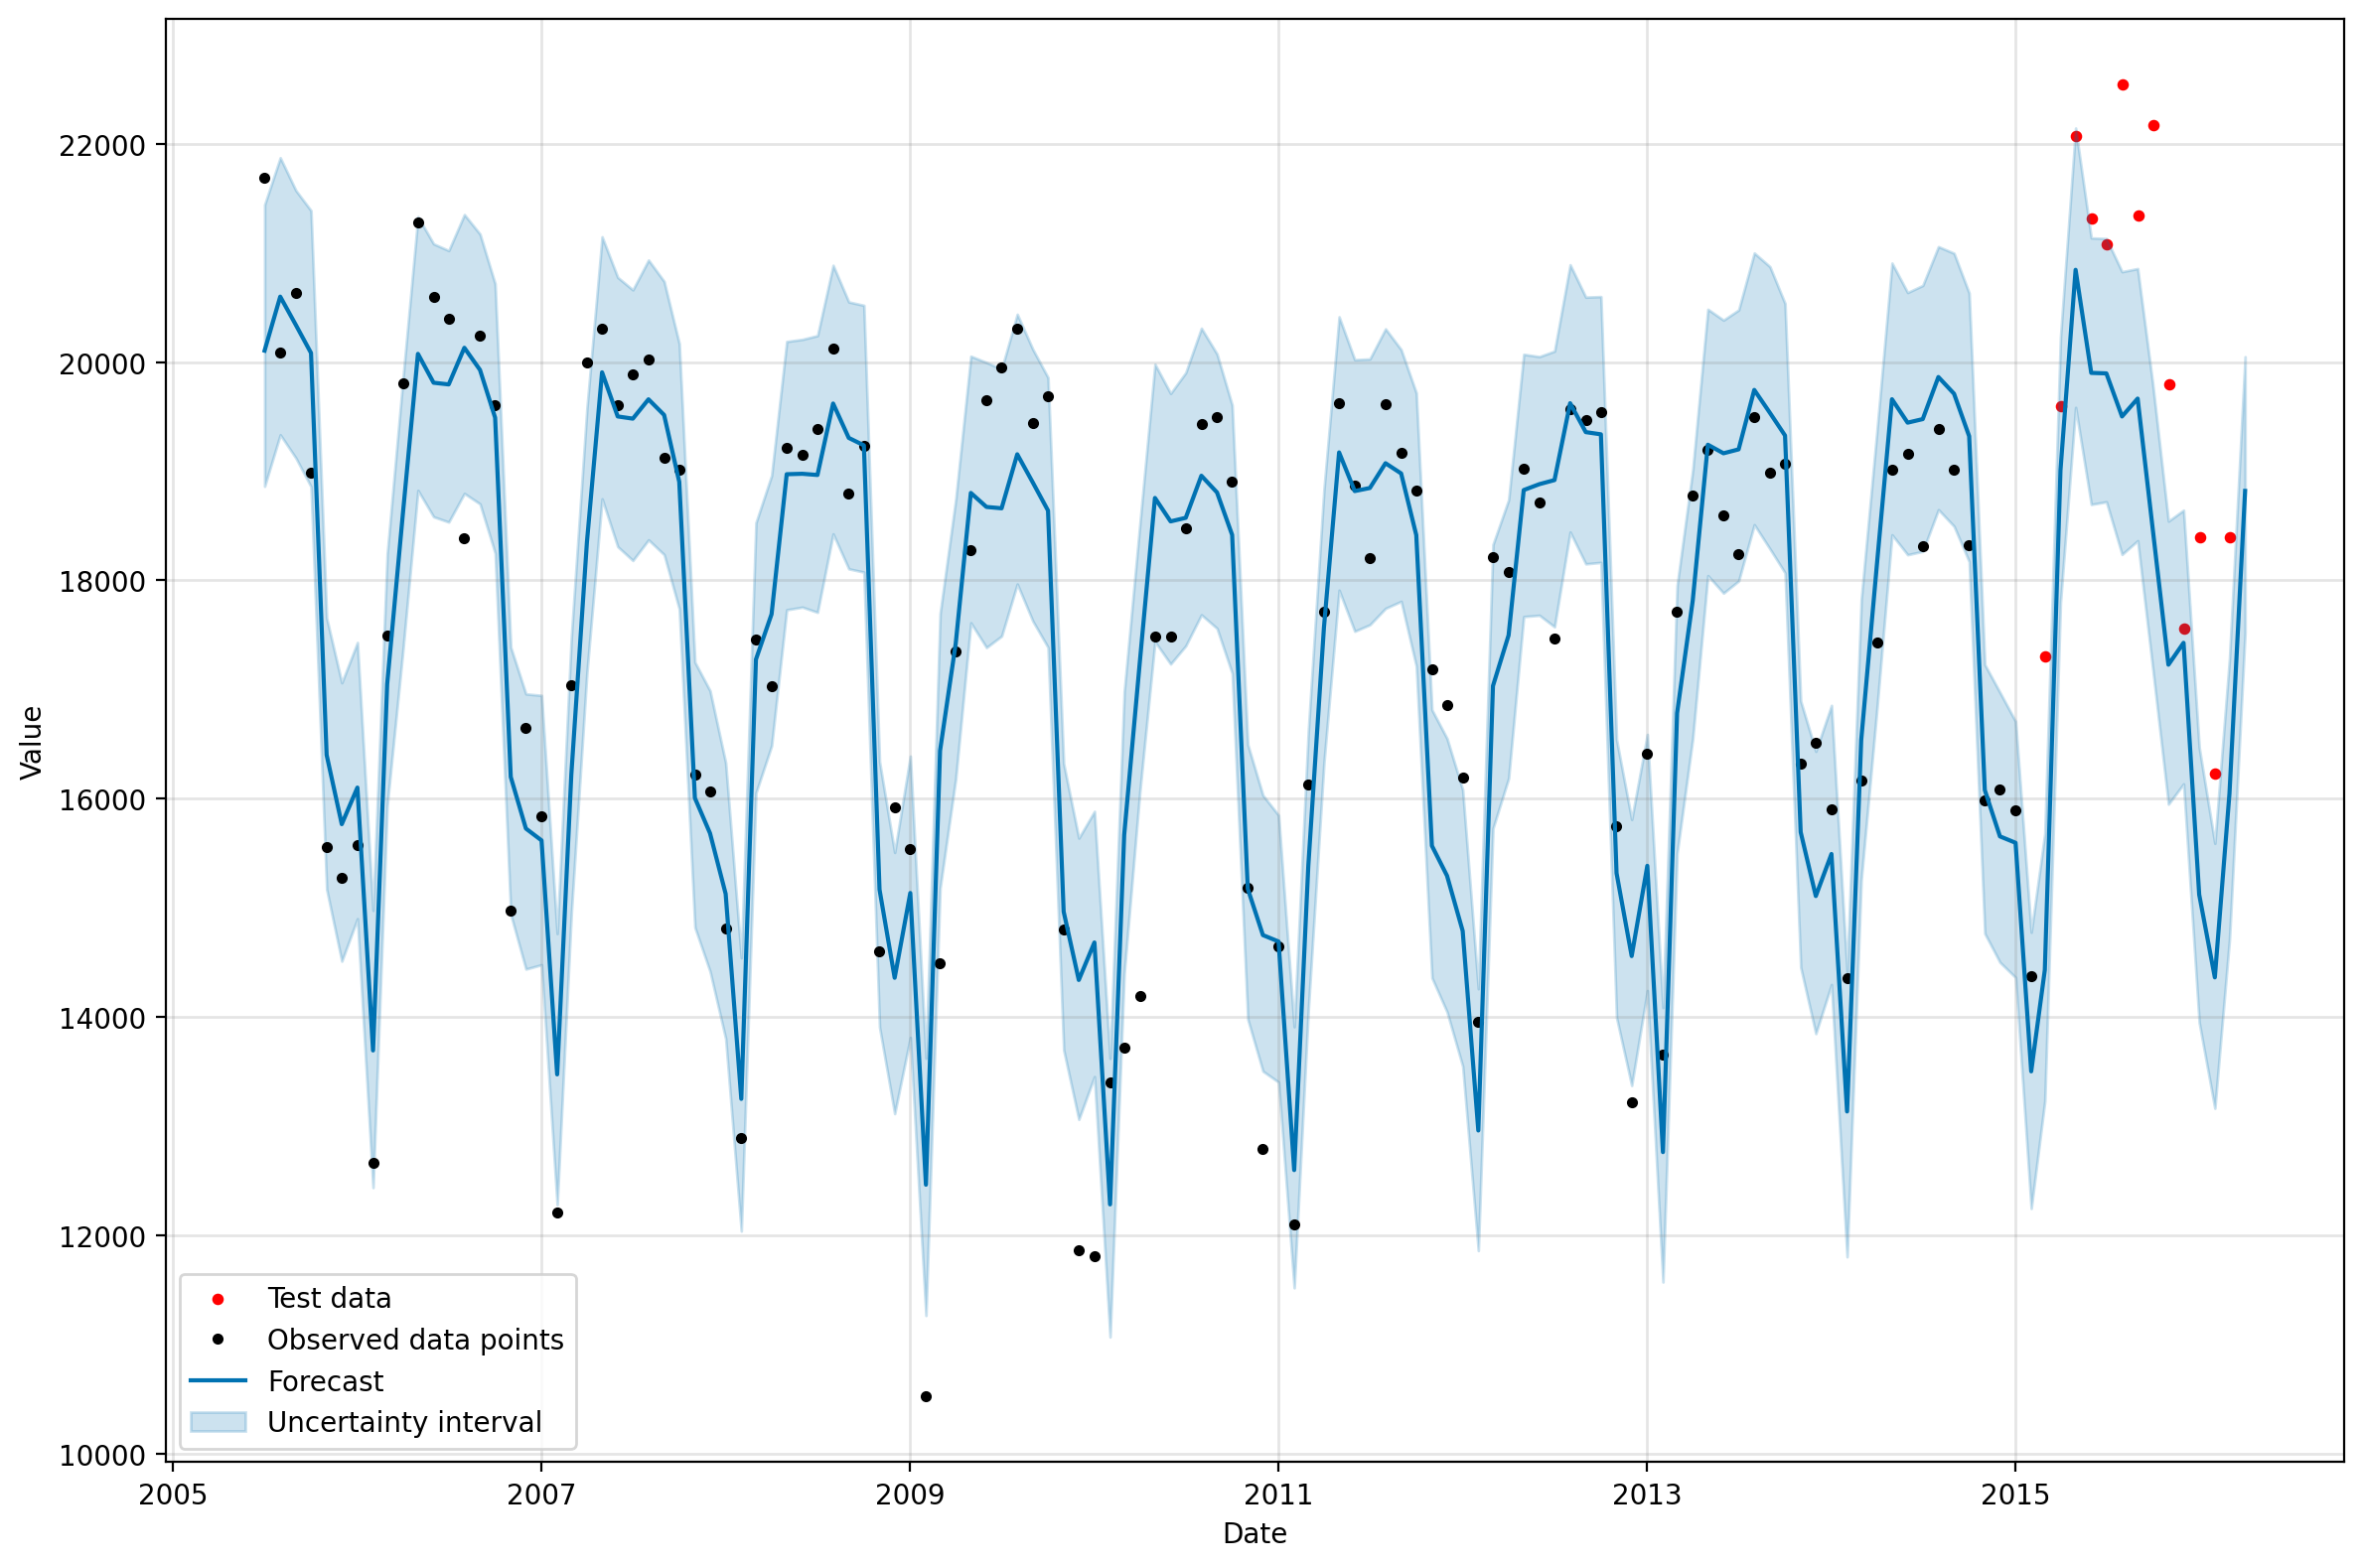

In [12]:
future = model.make_future_dataframe(periods=len(test_data) + 1, freq='M')
forecast = model.predict(future)

fig, ax = plt.subplots()
ax.scatter(test_data['ds'], test_data['y'], color='red', label='Test data', s=10)
model.plot(forecast, ax=ax, uncertainty=True, plot_cap=True, xlabel='Date', ylabel='Value')
plt.legend()
plt.show()

In [13]:
rmse = sqrt(mean_squared_error(forecast[-len(test_data):]['yhat'], test_data['y']))
print('RMSE: %f' % rmse)

RMSE: 2523.294332
